In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('telecom_churn_data.csv')

In [3]:
pd.set_option('display.max_columns',500)
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

### Mobile Number is unique in the dataset:-

In [4]:
df['mobile_number'].unique().shape[0]==df.shape[0]

True

### Store the average recharge amount in the good phase:-

In [5]:
df['avg_rech_good_phase']=round(df['total_rech_amt_6']+df['total_rech_amt_7']/2)

70th percentile of average recharge amount in the good phase:-

In [6]:
df['avg_rech_good_phase'].quantile(0.7)

554.0

### Keeping high value customers using the 70th percentile of the avg recharge amount in the good phase

In [7]:
df=df[df.avg_rech_good_phase>=554]

In [8]:
df.shape

(30031, 227)

### Tag churners using data of the churn phase:-
Those customers who haven't used any services in the churn phase are tagged as churn

In [9]:
df['churn']=0
df.loc[(df.total_ic_mou_9==0) & (df.total_og_mou_9) & (df.vol_2g_mb_9==0) & (df.vol_3g_mb_9==0),'churn']=1

In [10]:
df['churn'].value_counts()

0    29938
1       93
Name: churn, dtype: int64

### Drop all churn phase columns:-

In [11]:
drop_cols = [x for x in list(df.columns) if x.endswith('_9')]

In [12]:
df.drop(drop_cols,axis=1,inplace=True)

In [13]:
df.shape

(30031, 174)

### Missing value analysis

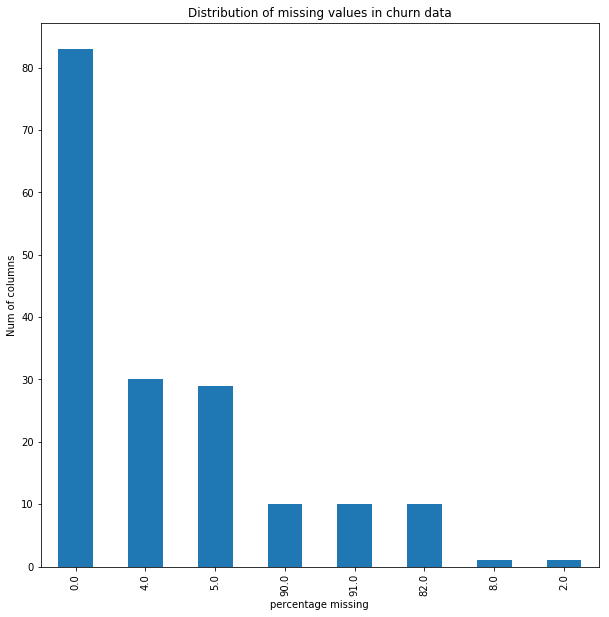

In [14]:
s = df[df.churn==1].isnull().sum()*100/df[df.churn==1].shape[0]
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
round(s).value_counts().plot(kind='bar')
plt.xlabel('percentage missing')
plt.ylabel('Num of columns')
plt.title('Distribution of missing values in churn data')
plt.show()

#### Columns with more than 70% missing data for churn customers will be dropped

In [15]:
df_churn = df[df.churn==1]
# Columns with more than 70% missing data afor churn customers will be dropped
cols_drop = list(df_churn.isnull().sum()[df_churn.isnull().sum()>70].index)
list(df_churn.isnull().sum()[df_churn.isnull().sum()>70].index)

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [16]:
df.drop(cols_drop,axis=1,inplace=True)

Check missing values again

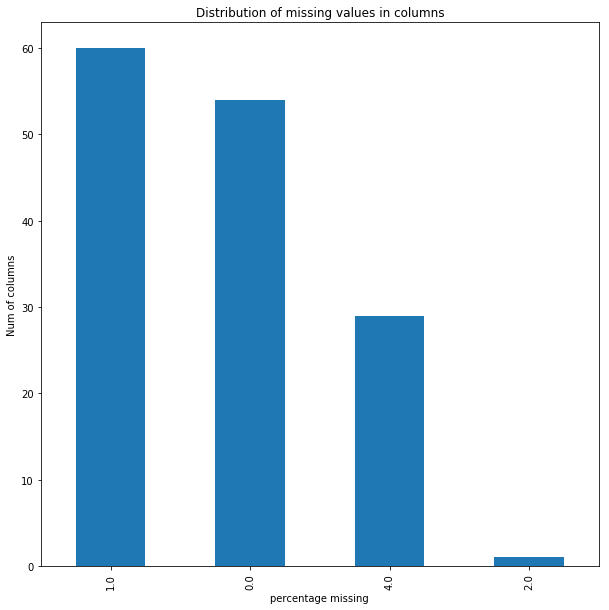

In [17]:
s = df.isnull().sum()*100/df.shape[0]

plt.figure(figsize=(10,10))
round(s).value_counts().plot(kind='bar')
plt.xlabel('percentage missing')
plt.ylabel('Num of columns')
plt.title('Distribution of missing values in columns')
plt.show()

#### Rmove the rows with missing values :-

In [18]:
df=df[df.isnull().sum(axis=1)==0]

(df.isnull().sum()*100/df.shape[0]).unique().tolist()

[0.0]

### Derive new features for predicting churn:-

1.  Combining june and july month data as good phase using mean
2.  Then we can drop original june and juy month columns

In [19]:
# First drop unnecessary columns
df.drop(['mobile_number','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
        'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8'],axis=1,inplace=True)

In [20]:
df['avg_arpu_good'] = round(df['arpu_6']+df['arpu_7']/2)
df['avg_onnet_mou_good'] = round(df['onnet_mou_6']+df['onnet_mou_7']/2)
df['avg_offnet_mou_good'] = round(df['offnet_mou_6']+df['offnet_mou_7']/2)
df['avg_roam_ic_good'] = round(df['roam_ic_mou_6']+df['roam_ic_mou_7']/2)
df['avg_roam_og_good'] = round(df['roam_og_mou_6']+df['roam_og_mou_7']/2)
df['avg_loc_og_t2t_mou_good'] = round(df['loc_og_t2t_mou_6']+df['loc_og_t2t_mou_7']/2)
df['avg_loc_og_t2m_mou_good'] = round(df['loc_og_t2m_mou_6']+df['loc_og_t2m_mou_7']/2)
df['avg_loc_og_t2f_mou_good'] = round(df['loc_og_t2f_mou_6']+df['loc_og_t2f_mou_7']/2)
df['avg_loc_og_t2c_mou_good'] = round(df['loc_og_t2c_mou_6']+df['loc_og_t2c_mou_7']/2)
df['avg_loc_og_mou_good'] = round(df['loc_og_mou_6']+df['loc_og_mou_7']/2)
df['avg_std_og_t2t_mou_good'] = round(df['std_og_t2t_mou_6']+df['std_og_t2t_mou_7']/2)
df['avg_std_og_t2m_mou_good'] = round(df['std_og_t2m_mou_6']+df['std_og_t2m_mou_7']/2)
df['avg_std_og_t2f_mou_good'] = round(df['std_og_t2f_mou_6']+df['std_og_t2f_mou_7']/2)
df['avg_std_og_t2c_mou_good'] = round(df['std_og_t2c_mou_6']+df['std_og_t2c_mou_7']/2)
df['avg_std_mou_good'] = round(df['std_og_mou_6']+df['std_og_mou_7']/2)
df['avg_isd_mou_good'] = round(df['isd_og_mou_6']+df['isd_og_mou_7']/2)
df['avg_spl_og_mou_good'] = round(df['spl_og_mou_6']+df['spl_og_mou_7']/2)
df['avg_og_others_good'] = round(df['og_others_6']+df['og_others_7']/2)
df['avg_total_og_mou_good'] = round(df['total_og_mou_6']+df['total_og_mou_7']/2)
df['avg_loc_ic_t2t_mou_good'] = round(df['loc_ic_t2t_mou_6']+df['loc_ic_t2t_mou_7']/2)
df['avg_loc_ic_t2m_mou_good'] = round(df['loc_ic_t2m_mou_6']+df['loc_ic_t2m_mou_7']/2)
df['avg_loc_ic_t2f_mou_good'] = round(df['loc_ic_t2f_mou_6']+df['loc_ic_t2f_mou_7']/2)
df['avg_loc_ic_mou_good'] = round(df['loc_ic_mou_6']+df['loc_ic_mou_6']/2)
df['avg_std_ic_t2t_mou_good'] = round(df['std_ic_t2t_mou_6']+df['std_ic_t2t_mou_7']/2)
df['avg_std_ic_t2m_mou_good'] = round(df['std_ic_t2m_mou_6']+df['std_ic_t2m_mou_7']/2)
df['avg_std_ic_t2f_mou_good'] = round(df['std_ic_t2f_mou_6']+df['std_ic_t2f_mou_7']/2)
df['avg_std_ic_t2o_mou_good'] = round(df['std_ic_t2o_mou_6']+df['std_ic_t2o_mou_7']/2)
df['avg_std_ic_mou_good'] = round(df['std_ic_mou_6']+df['std_ic_mou_7']/2)
df['avg_total_ic_mou_good'] = round(df['total_ic_mou_6']+df['total_ic_mou_7']/2)
df['avg_spl_ic_mou_good'] = round(df['spl_ic_mou_6']+df['spl_ic_mou_7']/2)
df['avg_isd_ic_mou_good'] = round(df['isd_ic_mou_6']+df['isd_ic_mou_7']/2)
df['avg_ic_others_good'] = round(df['ic_others_6']+df['ic_others_7']/2)
df['avg_total_rech_num_good'] = round(df['total_rech_num_6']+df['total_rech_num_7']/2)
df['avg_max_rech_amt_good'] = round(df['max_rech_amt_6']+df['max_rech_amt_7']/2)
df['avg_vol_2g_mb_good'] = round(df['vol_2g_mb_6']+df['vol_2g_mb_7']/2)
df['avg_vol_3g_mb_good'] = round(df['vol_3g_mb_6']+df['vol_3g_mb_7']/2)
df['avg_monthly_2g_good'] = round(df['monthly_2g_6']+df['monthly_2g_7']/2)
df['avg_sachet_2g_good'] = round(df['sachet_2g_6']+df['sachet_2g_7']/2)
df['avg_sachet_3g_good'] = round(df['sachet_3g_6']+df['sachet_3g_7']/2)
df['avg_monthly_3g_good'] = round(df['monthly_3g_6']+df['monthly_3g_7']/2)
df['avg_vbc_good'] = round(df['jun_vbc_3g']+df['jul_vbc_3g']/2)

In [21]:
### Now we can drop original good phase columns t reduce dimensionality
drop_cols = [x for x in list(df.columns) if (x.endswith('_6') or x.endswith('_7'))]
df.drop(drop_cols,axis=1,inplace=True)
df.drop('sep_vbc_3g',axis=1,inplace=True)
df.drop(['jun_vbc_3g','jul_vbc_3g'],axis=1,inplace=True)

In [22]:
df.shape

(28334, 89)

### Measuring the average decrease in usage values between good and churn phase for both categories of customers:-

The expectation is that customers who churn will have more drastic reduction in usage over T network between good and churn phases as compared to non-churn customers.

In [23]:
print('*'*100)
print("Reduction in on network minutes of usage for both categories from good to churn phase")
print('Average decrease in minutes of usage between good and churn phase for non churn customers:',np.mean(df[df.churn==0]['avg_onnet_mou_good']-df[df.churn==0]['onnet_mou_8']))
print('Average decrease in minutes of usage between good and churn phase for  churn customers:',np.mean(df[df.churn==1]['avg_onnet_mou_good']-df[df.churn==1]['onnet_mou_8']))
print('*'*100)
print("Reduction in off network minutes of usage for both categories from good to churn phase")
print('Average decrease in off network minutes of usage between good and churn phase for non churn customers:',np.mean(df[df.churn==0]['avg_offnet_mou_good']-df[df.churn==0]['offnet_mou_8']))
print('Average decrease in off network minutes of usage between good and churn phase for  churn customers:',np.mean(df[df.churn==1]['avg_offnet_mou_good']-df[df.churn==1]['offnet_mou_8']))
print('*'*100)
print("Reduction in local o/g minutes for both categories from good to churn phase")
print('Average decrease in local o/g minutes between good and churn phase for non churn customers:',np.mean(df[df.churn==0]['avg_loc_og_mou_good']-df[df.churn==0]['loc_og_mou_8']))
print('Average decrease in local o/g minutes between good and churn phase for  churn customers:',np.mean(df[df.churn==1]['avg_loc_og_mou_good']-df[df.churn==1]['loc_og_mou_8']))
print('*'*100)
print("Reduction in std o/g minutes for both categories from good to churn phase")
print('Average decrease in std o/g minutes between good and churn phase for non churn customers:',np.mean(df[df.churn==0]['avg_std_mou_good']-df[df.churn==0]['std_og_mou_8']))
print('Average decrease in std o/g minutes between good and churn phase for  churn customers:',np.mean(df[df.churn==1]['avg_std_mou_good']-df[df.churn==1]['std_og_mou_8']))
print('*'*100)
print("Reduction in total o/g minutes for both categories from good to churn phase")
print('Average decrease in total o/g minutes between good and churn phase for non churn customers:',np.mean(df[df.churn==0]['avg_total_og_mou_good']-df[df.churn==0]['total_og_mou_8']))
print('Average decrease in total o/g minutes between good and churn phase for  churn customers:',np.mean(df[df.churn==1]['avg_total_og_mou_good']-df[df.churn==1]['total_og_mou_8']))
print('*'*100)
print("Reduction in total incoming minutes for both categories from good to churn phase")
print('Average decrease in total i/c minutes between good and churn phase for non churn customers:',np.mean(df[df.churn==0]['avg_total_ic_mou_good']-df[df.churn==0]['total_ic_mou_8']))
print('Average decrease in total i/c minutes between good and churn phase for  churn customers:',np.mean(df[df.churn==1]['avg_total_ic_mou_good']-df[df.churn==1]['total_ic_mou_8']))
print('*'*100)
print("Reduction in total number of recharges for both categories from good to churn phase")
print('Average decrease in total num of recharges between good and churn phase for non churn customers:',np.mean(df[df.churn==0]['avg_total_rech_num_good']-df[df.churn==0]['total_rech_num_8']))
print('Average decrease in total num of recharges between good and churn phase for  churn customers:',np.mean(df[df.churn==1]['avg_total_rech_num_good']-df[df.churn==1]['total_rech_num_8']))
print('*'*100)
print("Reduction in max recharge amounts for both categories from good to churn phase")
print('Average decrease in total max recharge between good and churn phase for non churn customers:',np.mean(df[df.churn==0]['avg_max_rech_amt_good']-df[df.churn==0]['max_rech_amt_8']))
print('Average decrease in total max recharge between good and churn phase for  churn customers:',np.mean(df[df.churn==1]['avg_max_rech_amt_good']-df[df.churn==1]['max_rech_amt_8']))
print('*'*100)
print("Reduction in 2g usage for both categories from good to churn phase")
print('Average decrease in 2g usage between good and churn phase for non churn customers:',np.mean(df[df.churn==0]['avg_vol_2g_mb_good']-df[df.churn==0]['vol_2g_mb_8']))
print('Average decrease in 2g usage between good and churn phase for  churn customers:',np.mean(df[df.churn==1]['avg_vol_2g_mb_good']-df[df.churn==1]['vol_2g_mb_8']))
print('*'*100)
print("Reduction in 3g usage for both categories from good to churn phase")
print('Average decrease in 3g usage between good and churn phase for non churn customers:',np.mean(df[df.churn==0]['avg_vol_3g_mb_good']-df[df.churn==0]['vol_3g_mb_8']))
print('Average decrease in 3g usage between good and churn phase for  churn customers:',np.mean(df[df.churn==1]['avg_vol_3g_mb_good']-df[df.churn==1]['vol_3g_mb_8']))
print('*'*100)
print("Reduction in volume based cost for both categories from good to churn phase")
print('Average decrease in vbc between good and churn phase for non churn customers:',np.mean(df[df.churn==0]['avg_vbc_good']-df[df.churn==0]['aug_vbc_3g']))
print('Average decrease in vbc between good and churn phase for  churn customers:',np.mean(df[df.churn==1]['avg_vbc_good']-df[df.churn==1]['aug_vbc_3g']))
print('*'*100)

****************************************************************************************************
Reduction in on network minutes of usage for both categories from good to churn phase
Average decrease in minutes of usage between good and churn phase for non churn customers: 183.33422252105478
Average decrease in minutes of usage between good and churn phase for  churn customers: 381.4705263157894
****************************************************************************************************
Reduction in off network minutes of usage for both categories from good to churn phase
Average decrease in off network minutes of usage between good and churn phase for non churn customers: 257.2192989595797
Average decrease in off network minutes of usage between good and churn phase for  churn customers: 372.1538157894737
****************************************************************************************************
Reduction in local o/g minutes for both categories from good to churn

#### So, churn customers have a more drastic reduction of usage between good and churn phase as far as below measures are concerned:-

1. Max recharge amount
2. Total number of recharges
3. Outgoing minutes of usage
4. Local outgoing minutes
5. On network minutes of usage
6. Off network minutes of usage

This will be clear from following boxplots:-


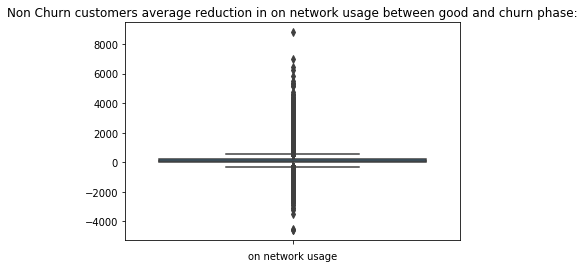

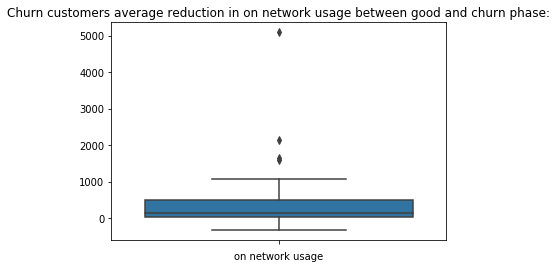

In [24]:
plt.title('Non Churn customers average reduction in on network usage between good and churn phase:')
sns.boxplot(y=df[df.churn==0]['avg_onnet_mou_good']-df[df.churn==0]['onnet_mou_8'])
plt.xlabel('on network usage')
plt.show()
plt.title('Churn customers average reduction in on network usage between good and churn phase:')
sns.boxplot(y=df[df.churn==1]['avg_onnet_mou_good']-df[df.churn==1]['onnet_mou_8'])
plt.xlabel('on network usage')
plt.show()

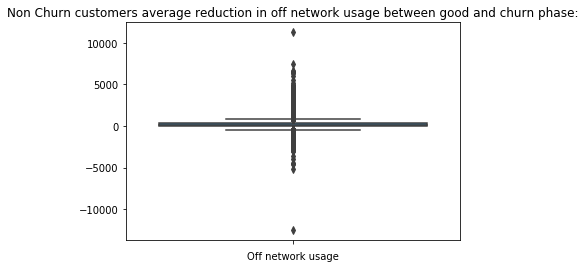

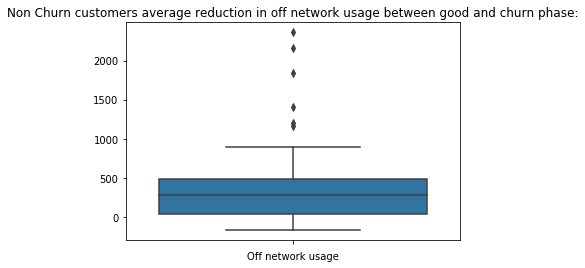

In [25]:
plt.title('Non Churn customers average reduction in off network usage between good and churn phase:')
sns.boxplot(y=df[df.churn==0]['avg_offnet_mou_good']-df[df.churn==0]['offnet_mou_8'])
plt.xlabel('Off network usage')
plt.show()
plt.title('Non Churn customers average reduction in off network usage between good and churn phase:')
sns.boxplot(y=df[df.churn==1]['avg_offnet_mou_good']-df[df.churn==1]['offnet_mou_8'])
plt.xlabel('Off network usage')
plt.show()

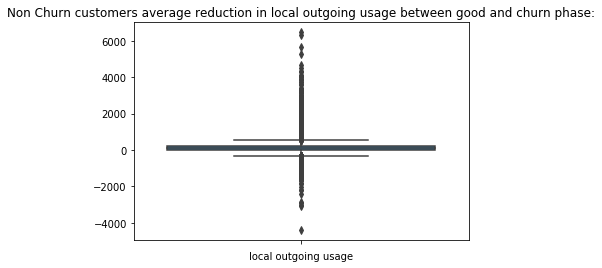

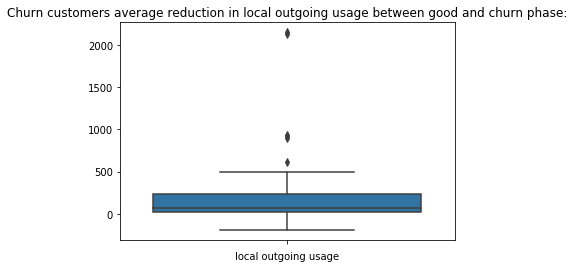

In [26]:
plt.title('Non Churn customers average reduction in local outgoing usage between good and churn phase:')
sns.boxplot(y=df[df.churn==0]['avg_loc_og_mou_good']-df[df.churn==0]['loc_og_mou_8'])
plt.xlabel('local outgoing usage')
plt.show()
plt.title('Churn customers average reduction in local outgoing usage between good and churn phase:')
sns.boxplot(y=df[df.churn==1]['avg_loc_og_mou_good']-df[df.churn==1]['loc_og_mou_8'])
plt.xlabel('local outgoing usage')
plt.show()

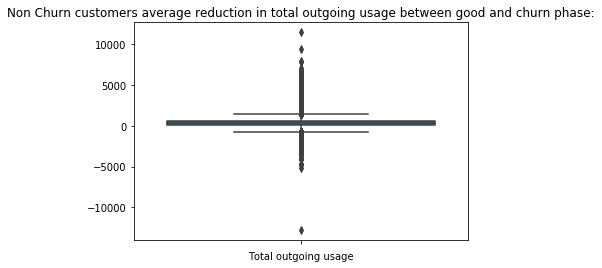

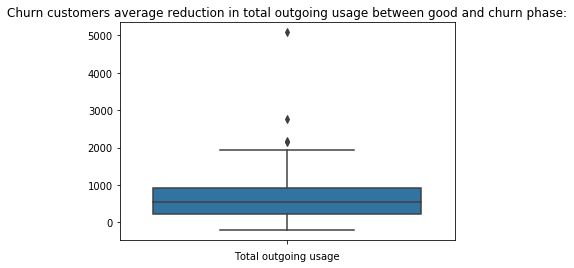

In [27]:
plt.title('Non Churn customers average reduction in total outgoing usage between good and churn phase:')
sns.boxplot(y=df[df.churn==0]['avg_total_og_mou_good']-df[df.churn==0]['total_og_mou_8'])
plt.xlabel('Total outgoing usage')
plt.show()
plt.title('Churn customers average reduction in total outgoing usage between good and churn phase:')
sns.boxplot(y=df[df.churn==1]['avg_total_og_mou_good']-df[df.churn==1]['total_og_mou_8'])
plt.xlabel('Total outgoing usage')
plt.show()

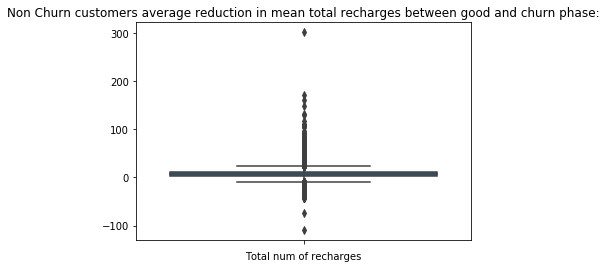

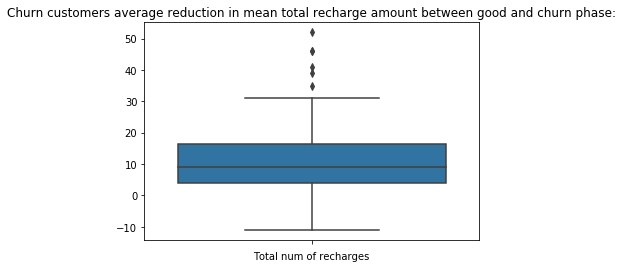

In [28]:
plt.title('Non Churn customers average reduction in mean total recharges between good and churn phase:')
sns.boxplot(y=df[df.churn==0]['avg_total_rech_num_good']-df[df.churn==0]['total_rech_num_8'])
plt.xlabel('Total num of recharges')
plt.show()
plt.title('Churn customers average reduction in mean total recharge amount between good and churn phase:')
sns.boxplot(y=df[df.churn==1]['avg_total_rech_num_good']-df[df.churn==1]['total_rech_num_8'])
plt.xlabel('Total num of recharges')
plt.show()

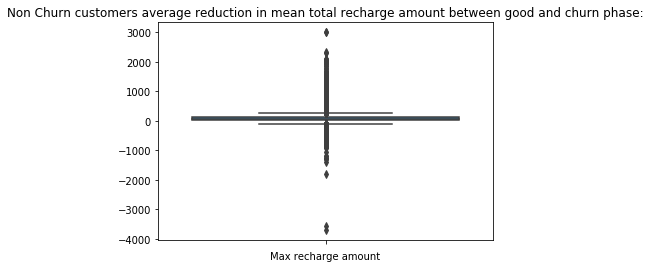

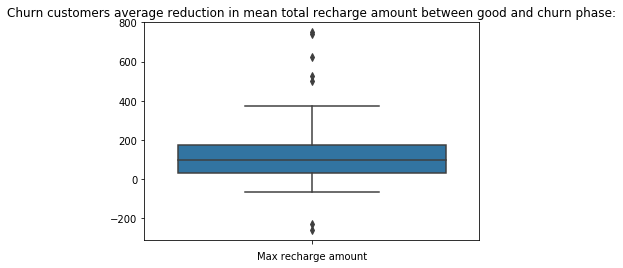

In [29]:
plt.title('Non Churn customers average reduction in mean total recharge amount between good and churn phase:')
sns.boxplot(y=df[df.churn==0]['avg_max_rech_amt_good']-df[df.churn==0]['max_rech_amt_8'])
plt.xlabel('Max recharge amount')
plt.show()
plt.title('Churn customers average reduction in mean total recharge amount between good and churn phase:')
sns.boxplot(y=df[df.churn==1]['avg_max_rech_amt_good']-df[df.churn==1]['max_rech_amt_8'])
plt.xlabel('Max recharge amount')
plt.show()

#### Creating new columns to quantify the difference between these indicators from good to action phase

In [30]:
df['dec_onnet_mou_usage']=df['avg_onnet_mou_good']-df['onnet_mou_8']
df['dec_offnet_mou_usage']=df['avg_offnet_mou_good']-df['offnet_mou_8']
df['dec_loc_og_mou_usage']=df['avg_loc_og_mou_good']-df['loc_og_mou_8']
df['dec_total_og_mou_usage']=df['avg_total_og_mou_good']-df['total_og_mou_8']
df['dec_total_rech_num']=df['avg_total_rech_num_good']-df['total_rech_num_8']
df['dec_max_rech_amt']=df['avg_max_rech_amt_good']-df['max_rech_amt_8']
# df.loc[df.churn==0,'dec_onnet_mou_usage']=0.0
# df.loc[df.churn==0,'dec_offnet_mou_usage']=0.0
# df.loc[df.churn==0,'dec_loc_og_mou_usage']=0.0
# df.loc[df.churn==0,'dec_total_og_mou_usage']=0.0
# df.loc[df.churn==0,'dec_total_rech_num']=0.0
# df.loc[df.churn==0,'dec_max_rech_amt']=0.0

### Correlation between variables


#### Below columns are  all 0s, so we can drop them

In [31]:
df[df.columns].sum()[df[df.columns].sum()==0]

loc_og_t2o_mou             0.0
std_og_t2o_mou             0.0
loc_ic_t2o_mou             0.0
std_og_t2c_mou_8           0.0
std_ic_t2o_mou_8           0.0
avg_std_og_t2c_mou_good    0.0
avg_std_ic_t2o_mou_good    0.0
dtype: float64

In [32]:
# Dropping these columns as they are having only 0.0 in them
df.drop(['loc_og_t2o_mou','loc_ic_t2o_mou','std_og_t2o_mou','std_og_t2c_mou_8','std_ic_t2o_mou_8','avg_std_og_t2c_mou_good','avg_std_ic_t2o_mou_good'],axis=1,inplace=True)

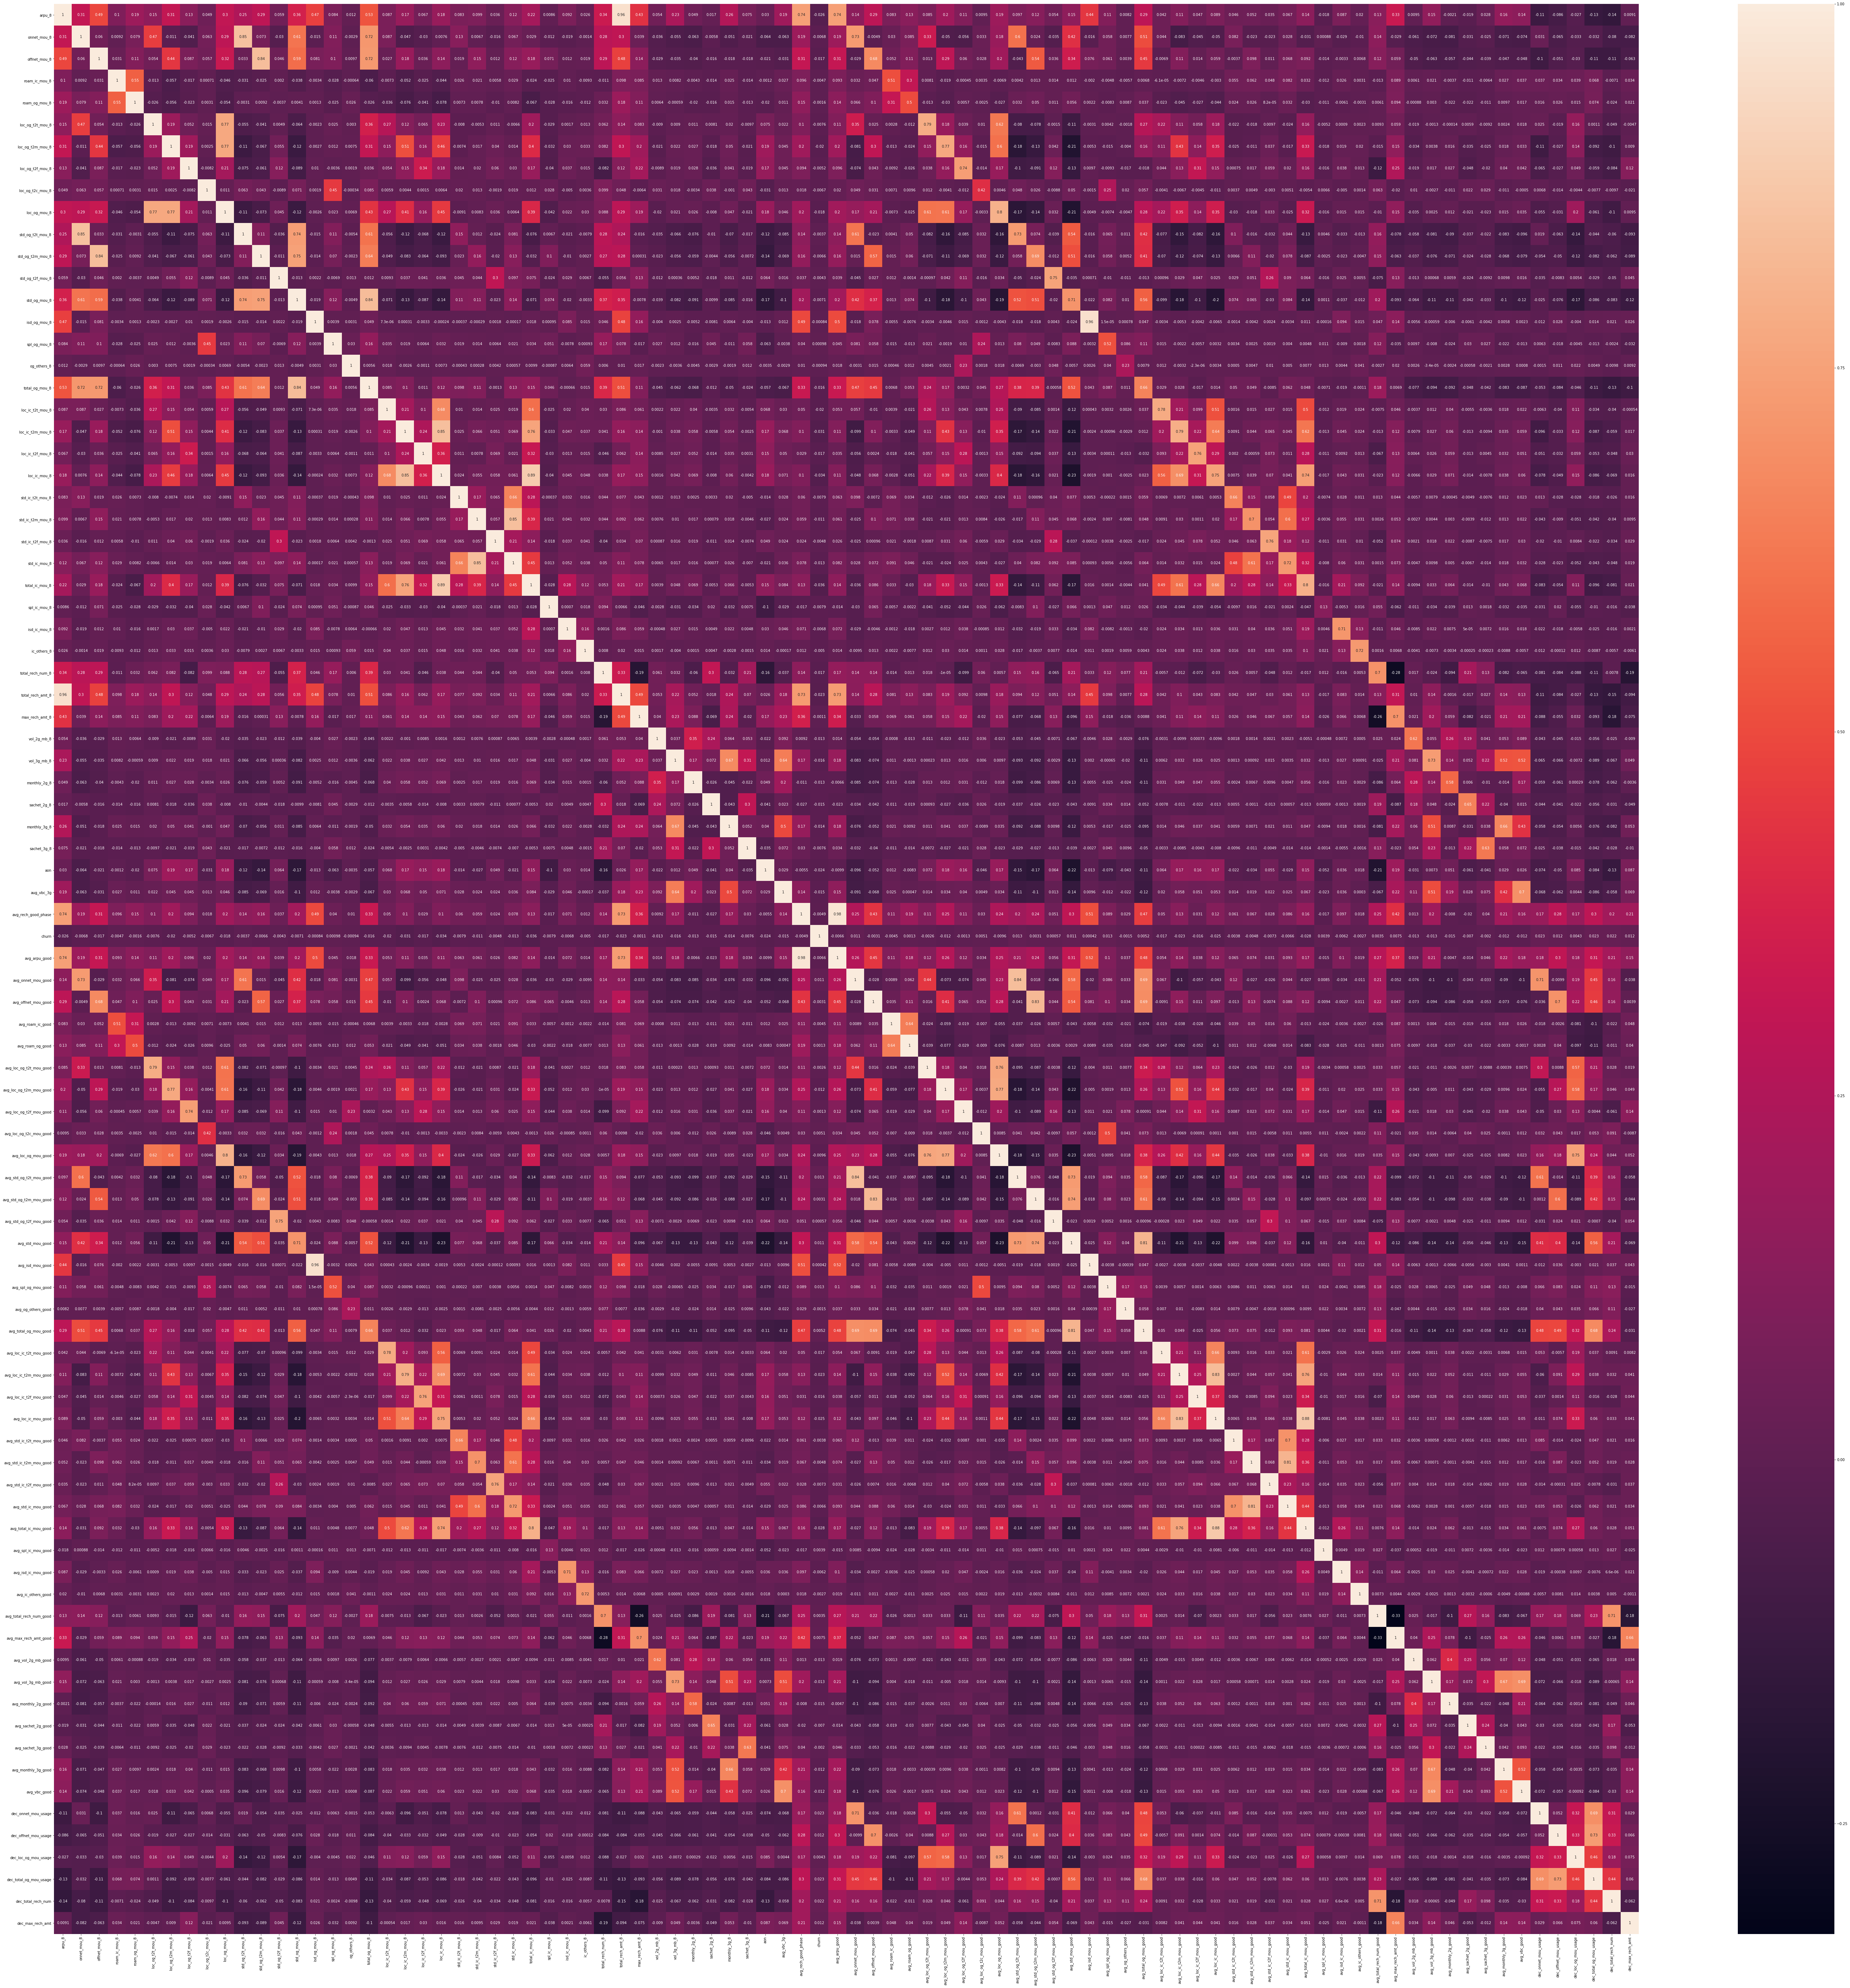

In [33]:
import seaborn as sns
corr_mat=df.corr()
plt.figure(figsize=(100,100))
sns.heatmap(corr_mat,annot=True)
plt.show()

There is correlation between certain columns.

### Column data distibution
The columns are not distributed Normally as clearly visible in the distribution plots:

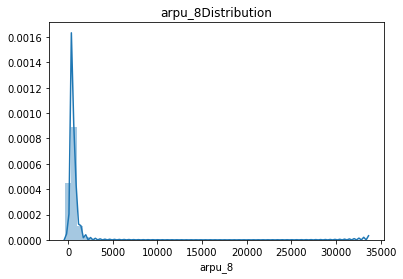

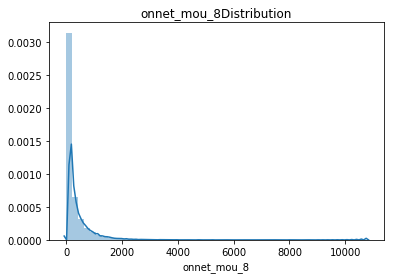

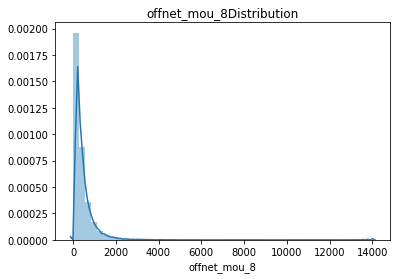

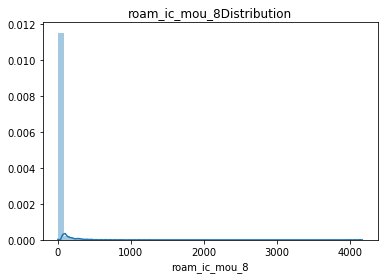

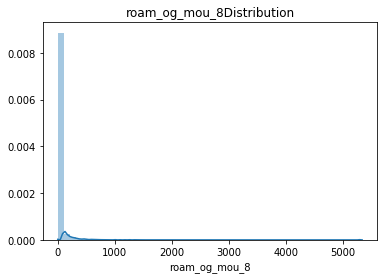

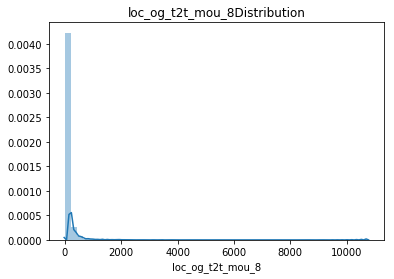

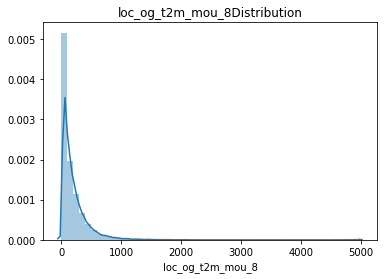

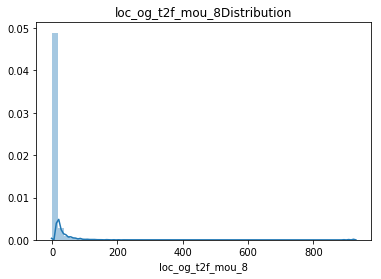

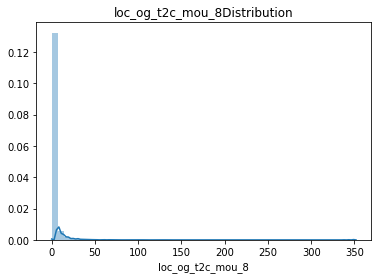

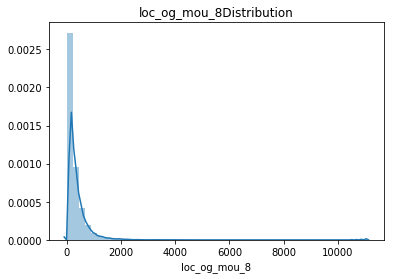

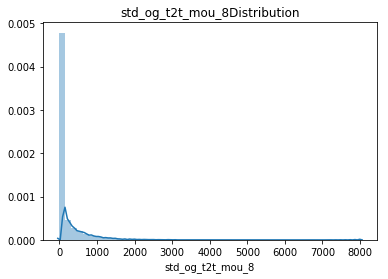

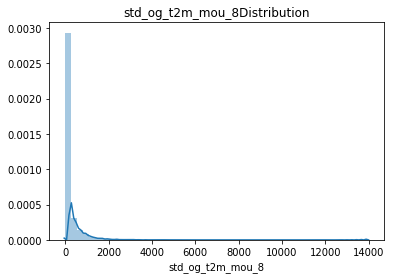

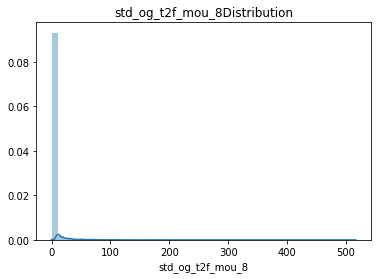

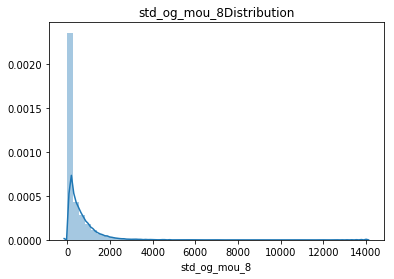

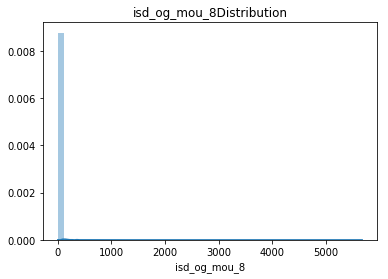

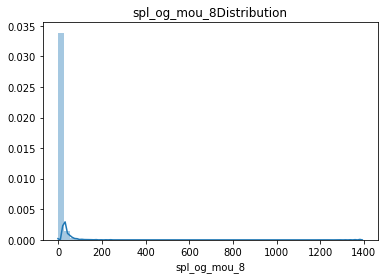

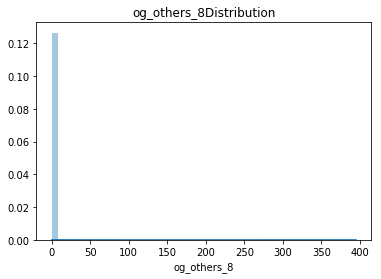

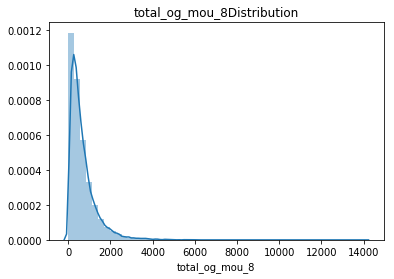

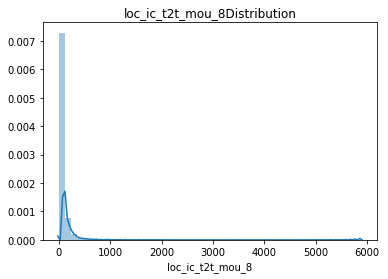

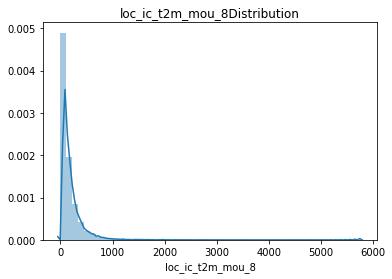

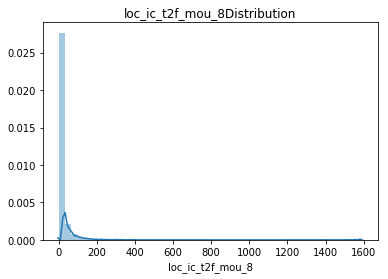

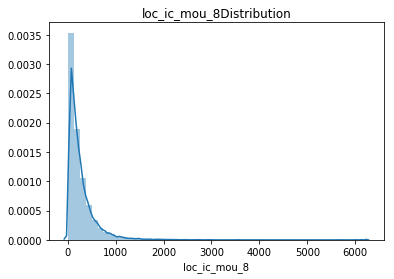

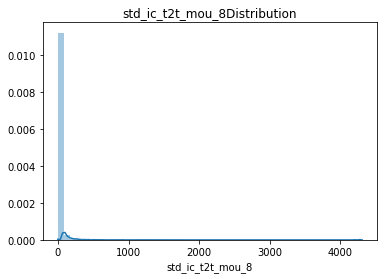

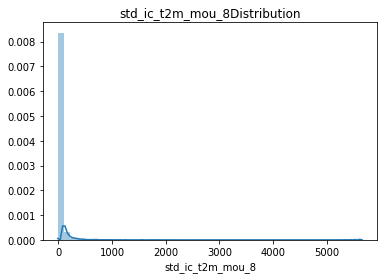

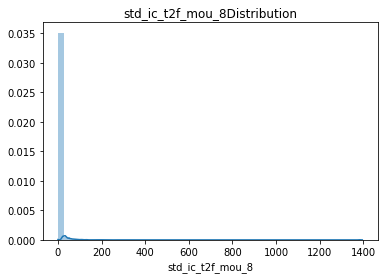

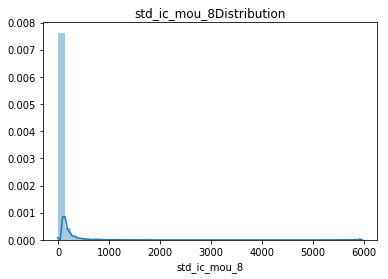

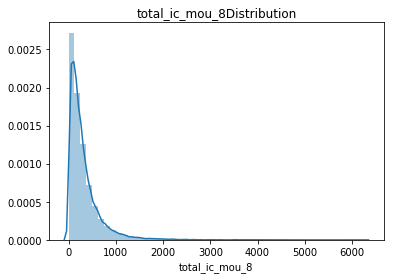

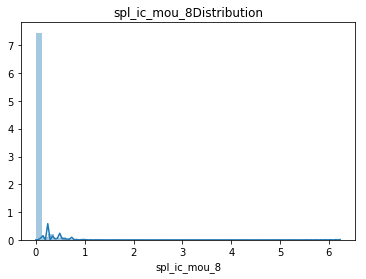

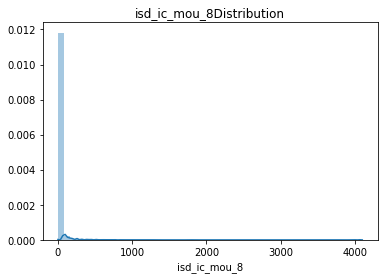

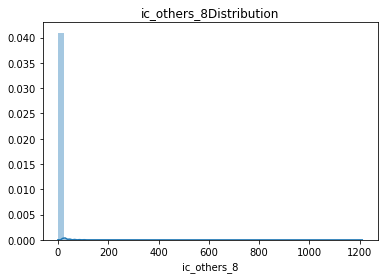

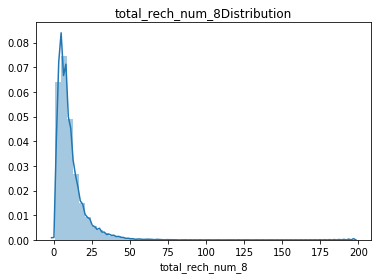

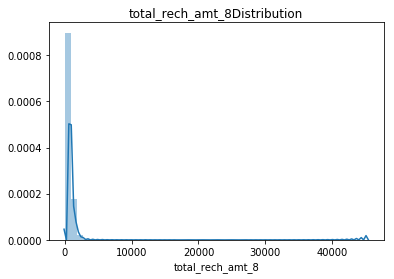

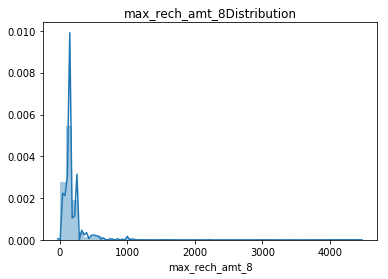

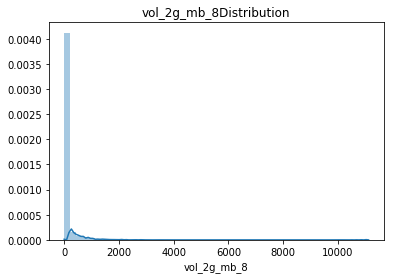

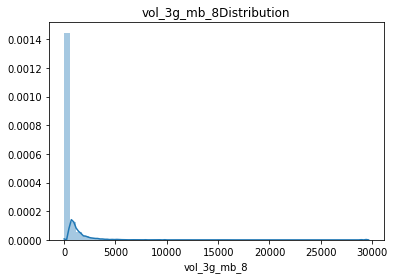

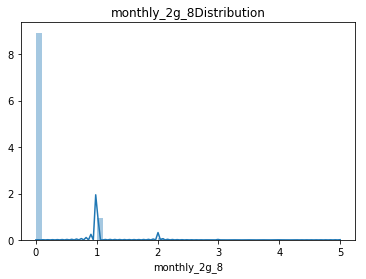

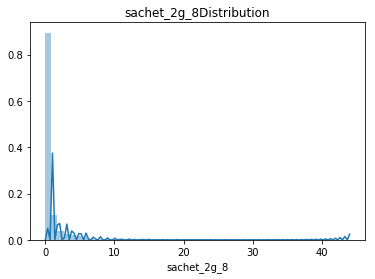

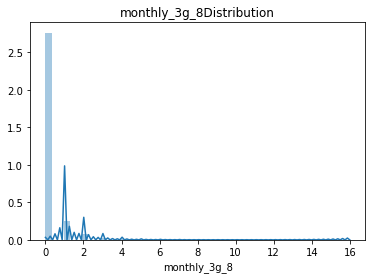

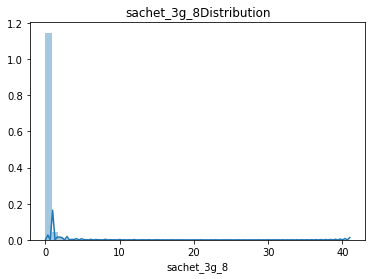

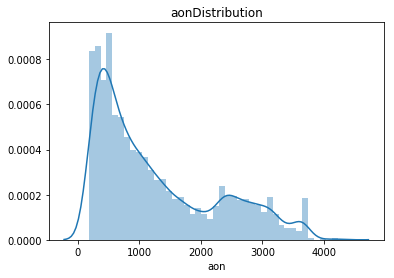

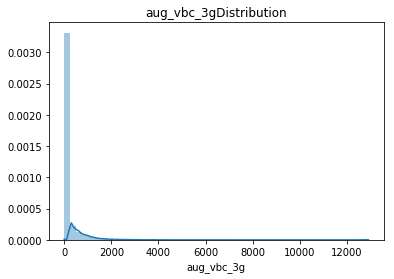

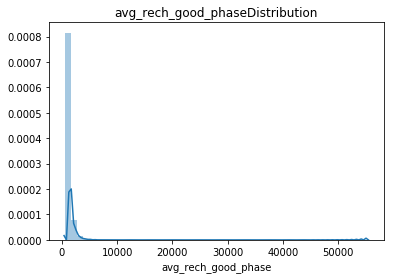

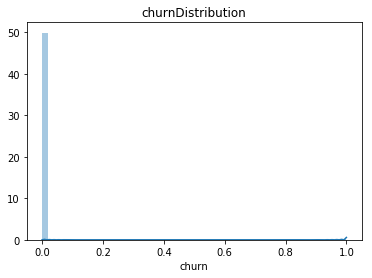

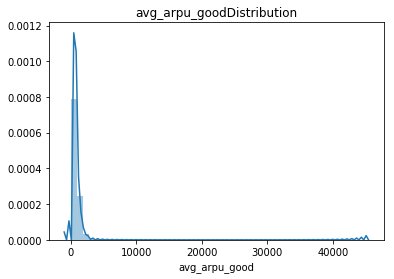

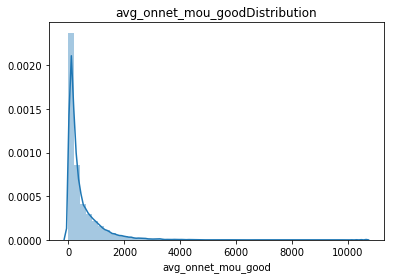

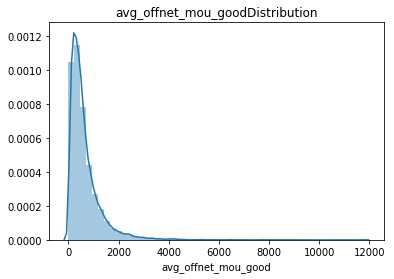

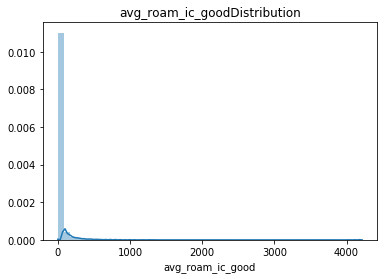

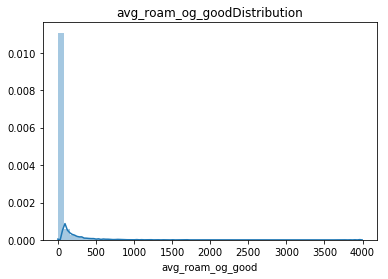

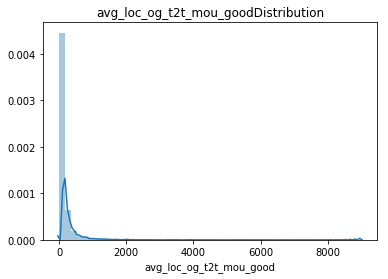

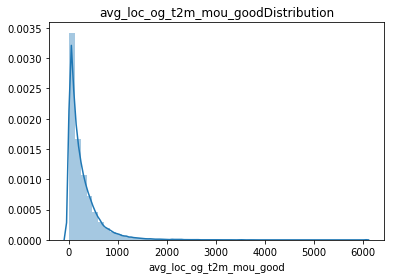

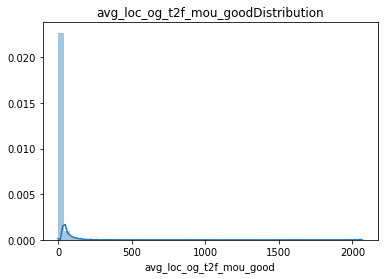

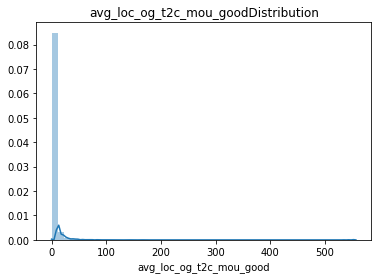

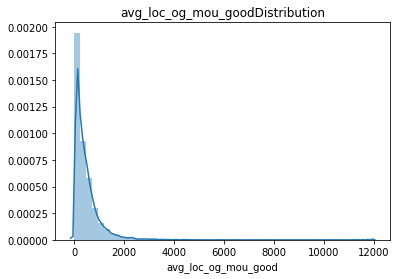

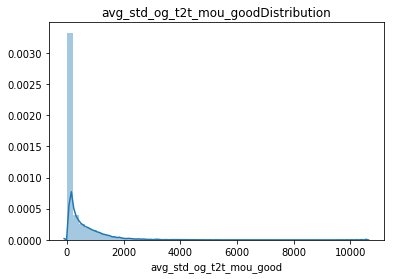

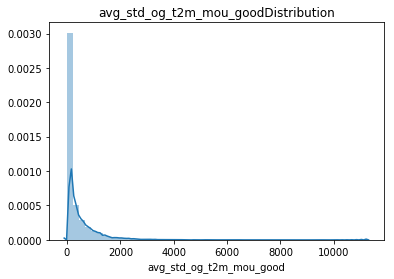

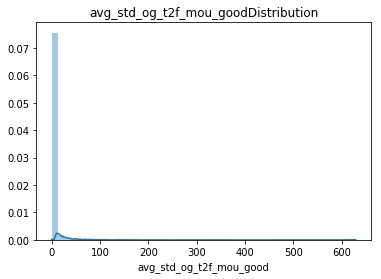

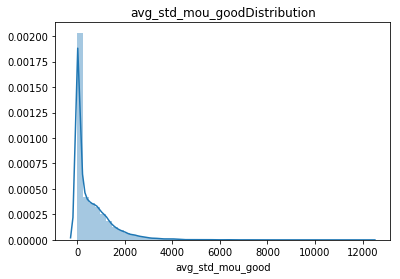

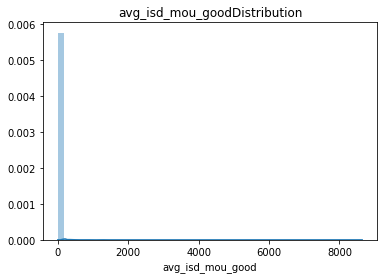

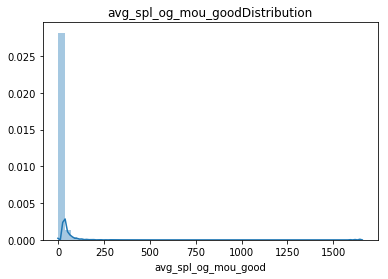

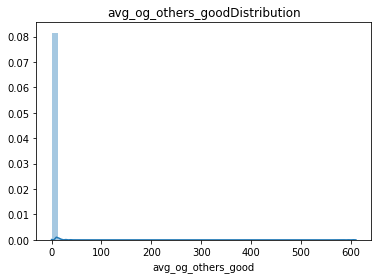

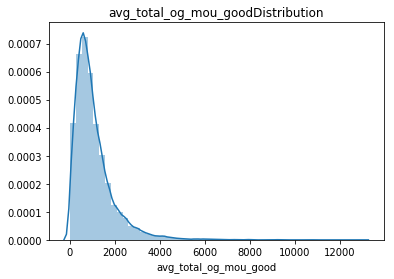

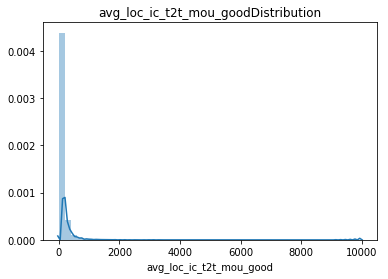

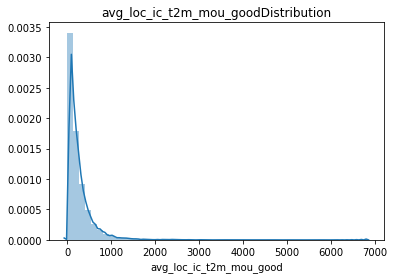

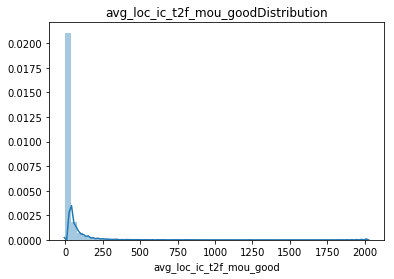

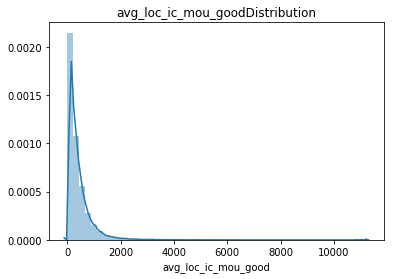

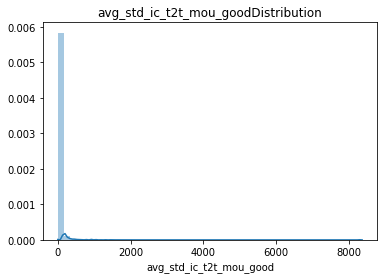

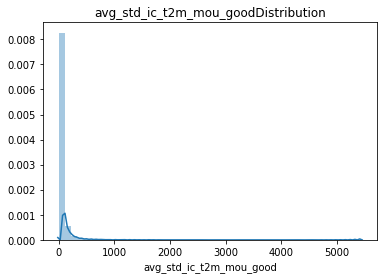

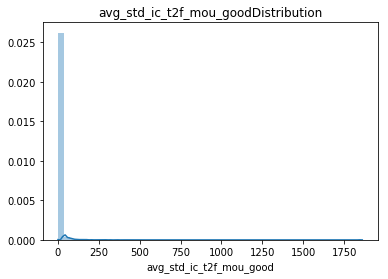

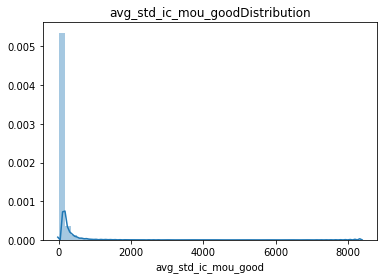

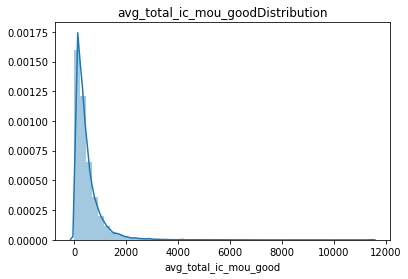

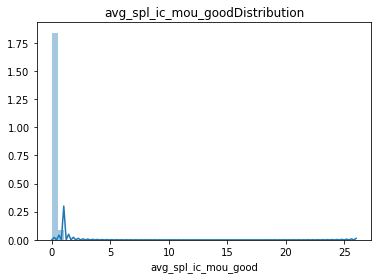

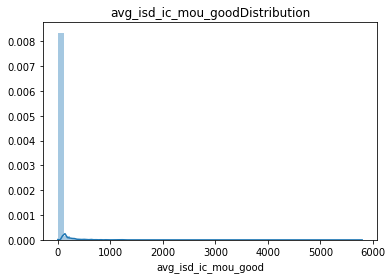

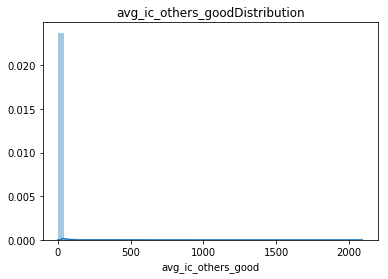

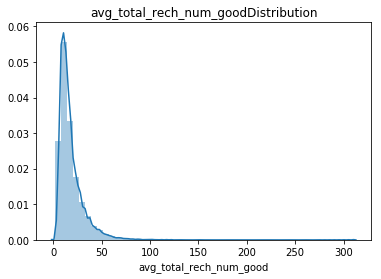

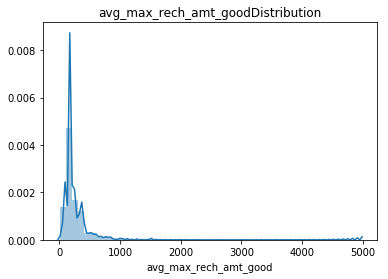

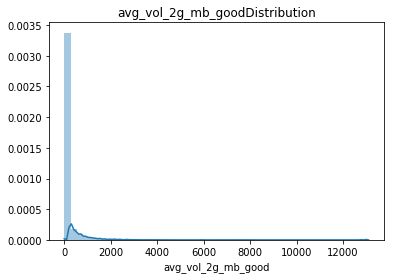

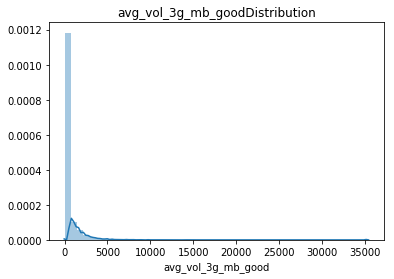

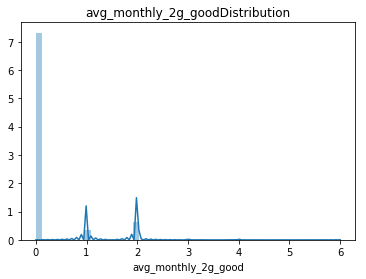

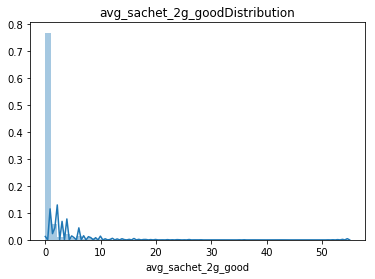

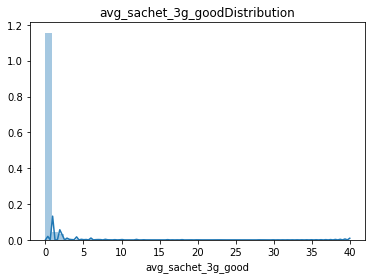

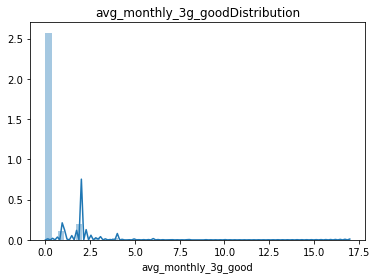

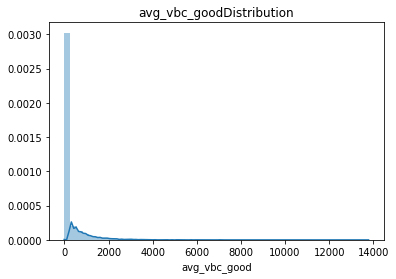

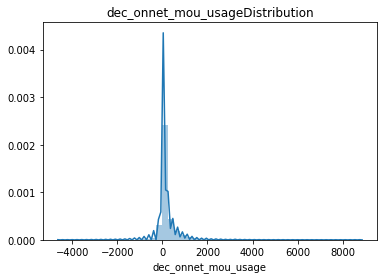

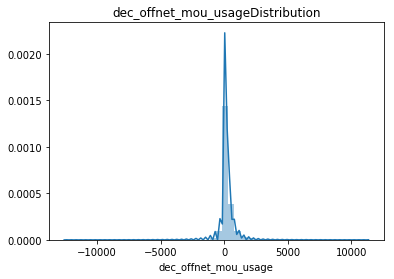

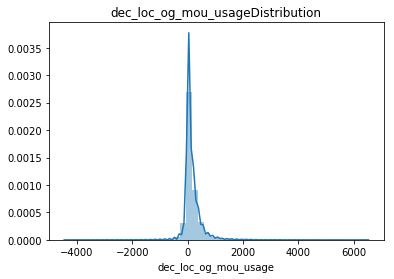

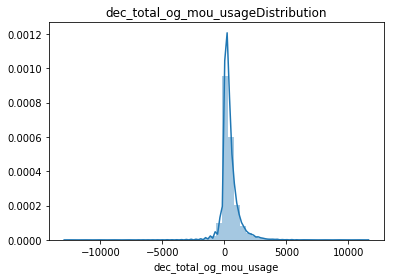

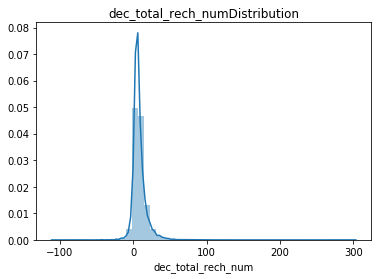

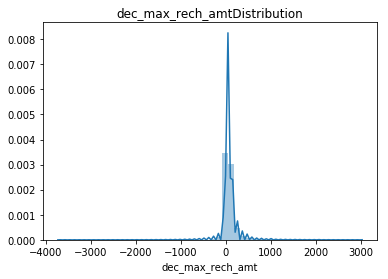

In [34]:
import numpy as np
for col in list(df.columns):
    
    plt.figure()
    plt.title(col + 'Distribution')
    sns.distplot((df[col]))
    plt.show()

### Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
Y = df.pop('churn')
X = df

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify = Y,random_state=100)

In [37]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('Y_train shape',Y_train.shape)
print('Y_test shape',Y_test.shape)

X_train shape (19833, 87)
X_test shape (8501, 87)
Y_train shape (19833,)
Y_test shape (8501,)


In [38]:
print('Y_train value counts')
print(Y_train.value_counts())
print('Y_test value counts')
print(Y_test.value_counts())

Y_train value counts
0    19780
1       53
Name: churn, dtype: int64
Y_test value counts
0    8478
1      23
Name: churn, dtype: int64


### Scaling the Data before PCA

In [39]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### PCA:-

Finding the optimal number of components first

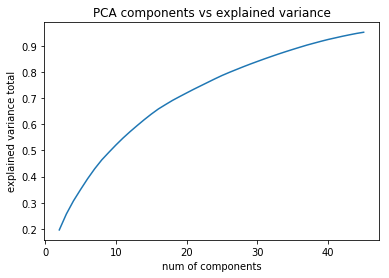

In [40]:
from sklearn.decomposition import PCA
import numpy as np
variance = []
for num_components in range(2,46):
    #print('Aplying PCA with',num_components,'components:')
    pca = PCA(n_components=num_components)
    pca.fit(X_train)
    #print('explained variance ratio:',np.sum(pca.explained_variance_ratio_))
    variance.append(np.sum(pca.explained_variance_ratio_))

plt.figure()
plt.plot(range(2,46),variance)
plt.xlabel('num of components')
plt.ylabel('explained variance total')
plt.title('PCA components vs explained variance')
plt.show()


About 90% variance is explained by 40 components

In [41]:
pca = PCA(n_components=40)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
print('Explained variance:',np.sum(pca.explained_variance_ratio_))

Explained variance: 0.9244183807884714


### Fitting Models:-

1. Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def auc_score(y_true,y_pred):
    return roc_auc_score(y_true,y_pred)

score = make_scorer(auc_score, greater_is_better=True)
param_grid={'C':[0.5,0.6,0.001],'penalty':['l1'],'class_weight':['balanced']}
grid_search = GridSearchCV(LogisticRegression(),cv=5,refit=True,param_grid=param_grid,scoring=score)
grid_search.fit(X_train,Y_train)
print('best estimator',grid_search.best_estimator_)
print('best score',grid_search.best_score_)

best estimator LogisticRegression(C=0.6, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
best score 0.7795967802564225


In [96]:
print('Test score for best Logistic Regression estimator:-',roc_auc_score(Y_test,grid_search.predict_proba(X_test)[:,1]))

Test score for best Logistic Regression estimator:- 0.9998666625639764


In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,grid_search.predict(X_test))

array([[8469,    9],
       [   2,   21]], dtype=int64)

In [98]:
print(classification_report(Y_test, grid_search.predict(X_test), target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8478
           1       0.70      0.91      0.79        23

   micro avg       1.00      1.00      1.00      8501
   macro avg       0.85      0.96      0.90      8501
weighted avg       1.00      1.00      1.00      8501



2. Decision Tree Classifier

In [99]:
from sklearn.tree import DecisionTreeClassifier

param_grid={'max_depth':[5,10,20,None],'max_features':['sqrt','log2',None],'class_weight':['balanced']}
grid_search = GridSearchCV(DecisionTreeClassifier(),cv=5,refit=True,param_grid=param_grid,scoring=score)
grid_search.fit(X_train,Y_train)
print('best estimator',grid_search.best_estimator_)
print('best score',grid_search.best_score_)

best estimator DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
best score 0.9536089286761482


In [100]:
print('Test score for best Decision Tree estimator',roc_auc_score(Y_test,grid_search.predict_proba(X_test)[:,1]))

Test score for best Decision Tree estimator 0.9999410238263741


In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,grid_search.predict(X_test))

array([[8477,    1],
       [   0,   23]], dtype=int64)

In [102]:
print(classification_report(Y_test, grid_search.predict(X_test), target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8478
           1       0.96      1.00      0.98        23

   micro avg       1.00      1.00      1.00      8501
   macro avg       0.98      1.00      0.99      8501
weighted avg       1.00      1.00      1.00      8501



3. Random Forest :-

In [103]:
from sklearn.ensemble import RandomForestClassifier

param_grid={'n_estimators':[100,200],'max_depth':[5,10],'max_features':['sqrt','log2',None],'class_weight':['balanced']}
grid_search = GridSearchCV(RandomForestClassifier(),refit=True,param_grid=param_grid,scoring=score,verbose=1)
grid_search.fit(X_train,Y_train)
print('best estimator',grid_search.best_estimator_)
print('best score',grid_search.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  9.0min finished


best estimator RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
best score 0.9624169824571117


In [104]:
print('Test score for best Random forest estimator',roc_auc_score(Y_test,grid_search.predict_proba(X_test)[:,1]))

Test score for best Random forest estimator 1.0


In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,grid_search.predict(X_test))

array([[8478,    0],
       [   0,   23]], dtype=int64)

In [106]:
print(classification_report(Y_test, grid_search.predict(X_test), target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8478
           1       1.00      1.00      1.00        23

   micro avg       1.00      1.00      1.00      8501
   macro avg       1.00      1.00      1.00      8501
weighted avg       1.00      1.00      1.00      8501



4. SVC with rbf kernel

In [107]:
from sklearn.svm import SVC

param_grid={'C':[0.01,0.1,0.001],'kernel':['rbf'],'gamma':[0.1,0.01,0.001],'class_weight':['balanced']}
grid_search = GridSearchCV(SVC(),cv=5,refit=True,param_grid=param_grid,scoring=score,n_jobs=-1,verbose=1)
grid_search.fit(X_train,Y_train)
print('best estimator',grid_search.best_estimator_)
print('best score',grid_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 10.1min finished


best estimator SVC(C=0.01, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
best score 0.9589902664683696


In [108]:
print('Test score for best SVC  estimator',roc_auc_score(Y_test,grid_search.predict(X_test)))

Test score for best SVC  estimator 0.9567345661917802


In [109]:
confusion_matrix(Y_test,grid_search.predict(X_test))

array([[8113,  365],
       [   1,   22]], dtype=int64)

In [110]:
print(classification_report(Y_test, grid_search.predict(X_test), target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      8478
           1       0.06      0.96      0.11        23

   micro avg       0.96      0.96      0.96      8501
   macro avg       0.53      0.96      0.54      8501
weighted avg       1.00      0.96      0.98      8501

